## Importing dependencies

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

## Exploring the data

In [2]:
data = pd.read_csv('data/laptop_price_dataset.csv')
data

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [3]:
data.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [4]:
duplicates = data.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1270    False
1271    False
1272    False
1273    False
1274    False
Length: 1275, dtype: bool


In [5]:
# Checking for null values
data.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

There are no null values, but i have to check for anomalies in the dataset

In [6]:
# Checking how many categories exist in each of the following categories
print(f"List of CPU Companies: {data['CPU_Company'].unique()}")
print(f"List of GPU Companies: {data['GPU_Company'].unique()}")
print(f"List of Operating Systems: {data['OpSys'].unique()}")

List of CPU Companies: ['Intel' 'AMD' 'Samsung']
List of GPU Companies: ['Intel' 'AMD' 'Nvidia' 'ARM']
List of Operating Systems: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [7]:
# Renaming the columns names
new_data = data.rename(columns={"CPU_Frequency (GHz)": "CPU_Frequency", "RAM (GB)": "RAM", "Weight (kg)": "Weight", "Price (Euro)": "Price"})
print(new_data.columns.tolist())

['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'CPU_Frequency', 'RAM', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys', 'Weight', 'Price']


## EDA

In [8]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-v0_8-whitegrid')

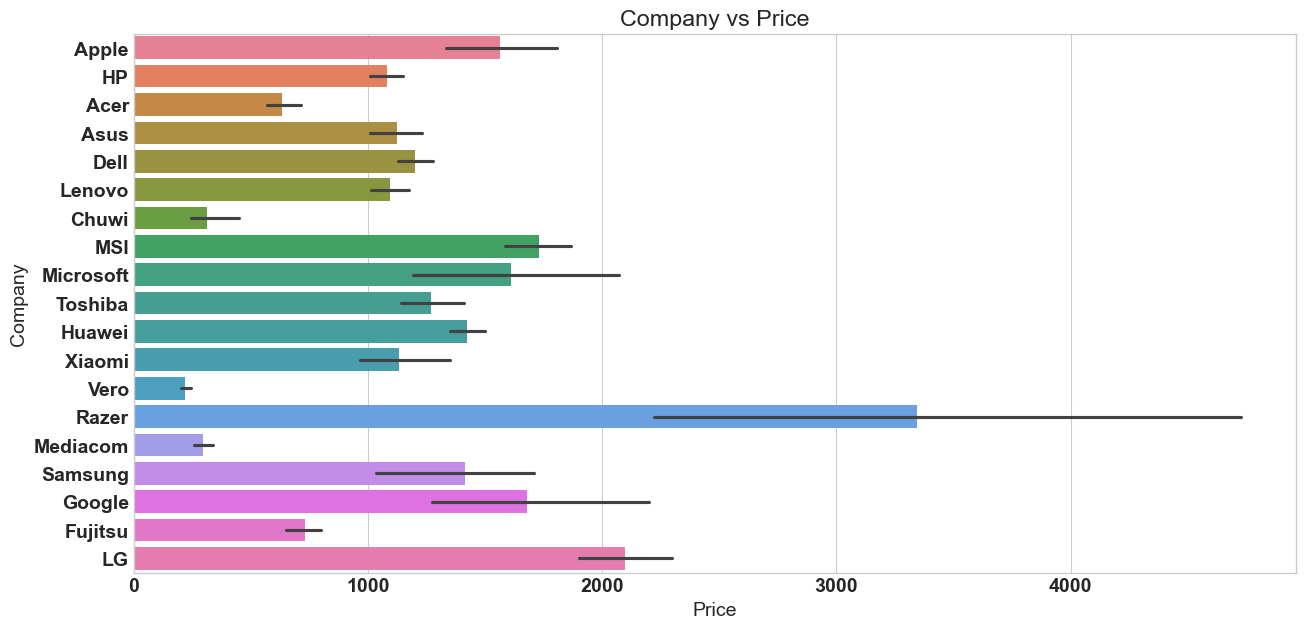

In [9]:
plt.figure(figsize=(15, 7))
sns.barplot(x="Price", y="Company", data=new_data, hue="Company")
plt.title('Company vs Price')
plt.savefig('graphimages/cp.png')

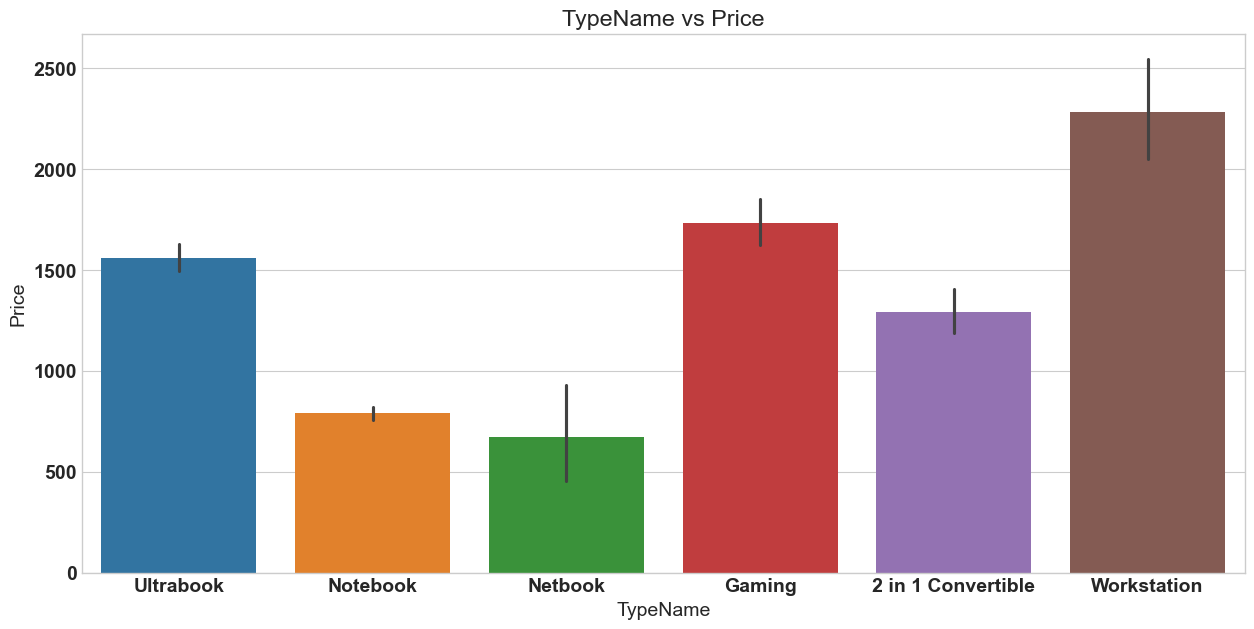

In [10]:
plt.figure(figsize=(15, 7))
sns.barplot(x="TypeName", y="Price", data=new_data, hue="TypeName")
plt.title('TypeName vs Price')
plt.savefig('graphimages/TyP.png')

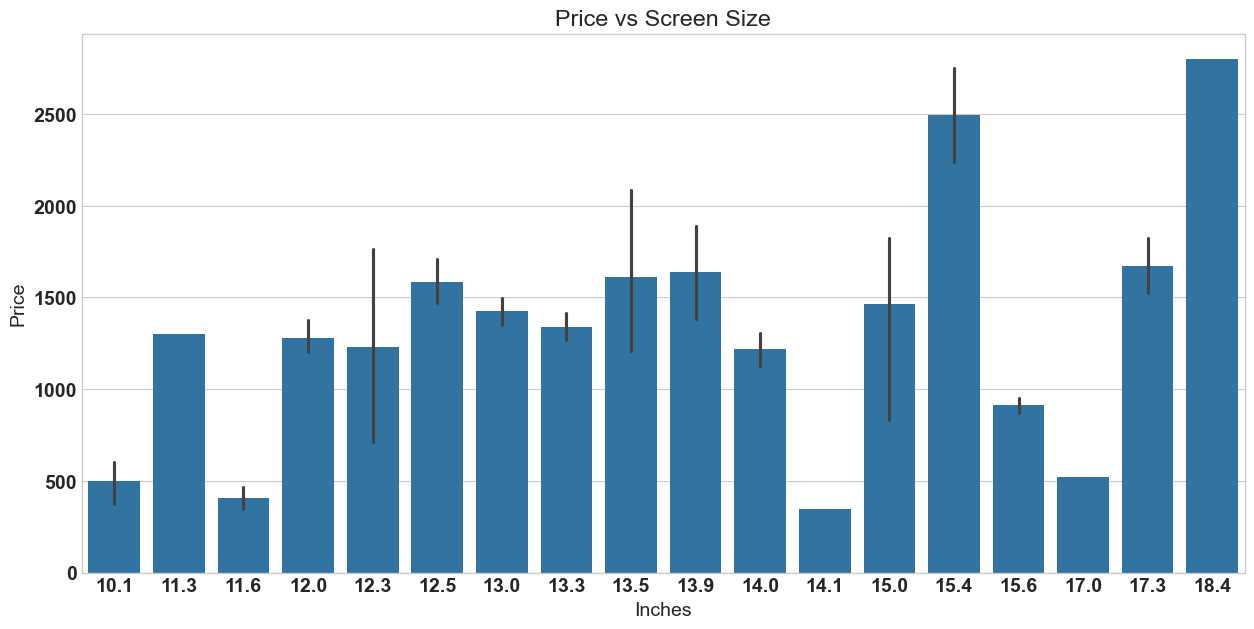

In [11]:
plt.figure(figsize=(15, 7))
sns.barplot(x="Inches", y="Price", data=new_data)
plt.title('Price vs Screen Size')
plt.savefig('graphimages/InP.png')

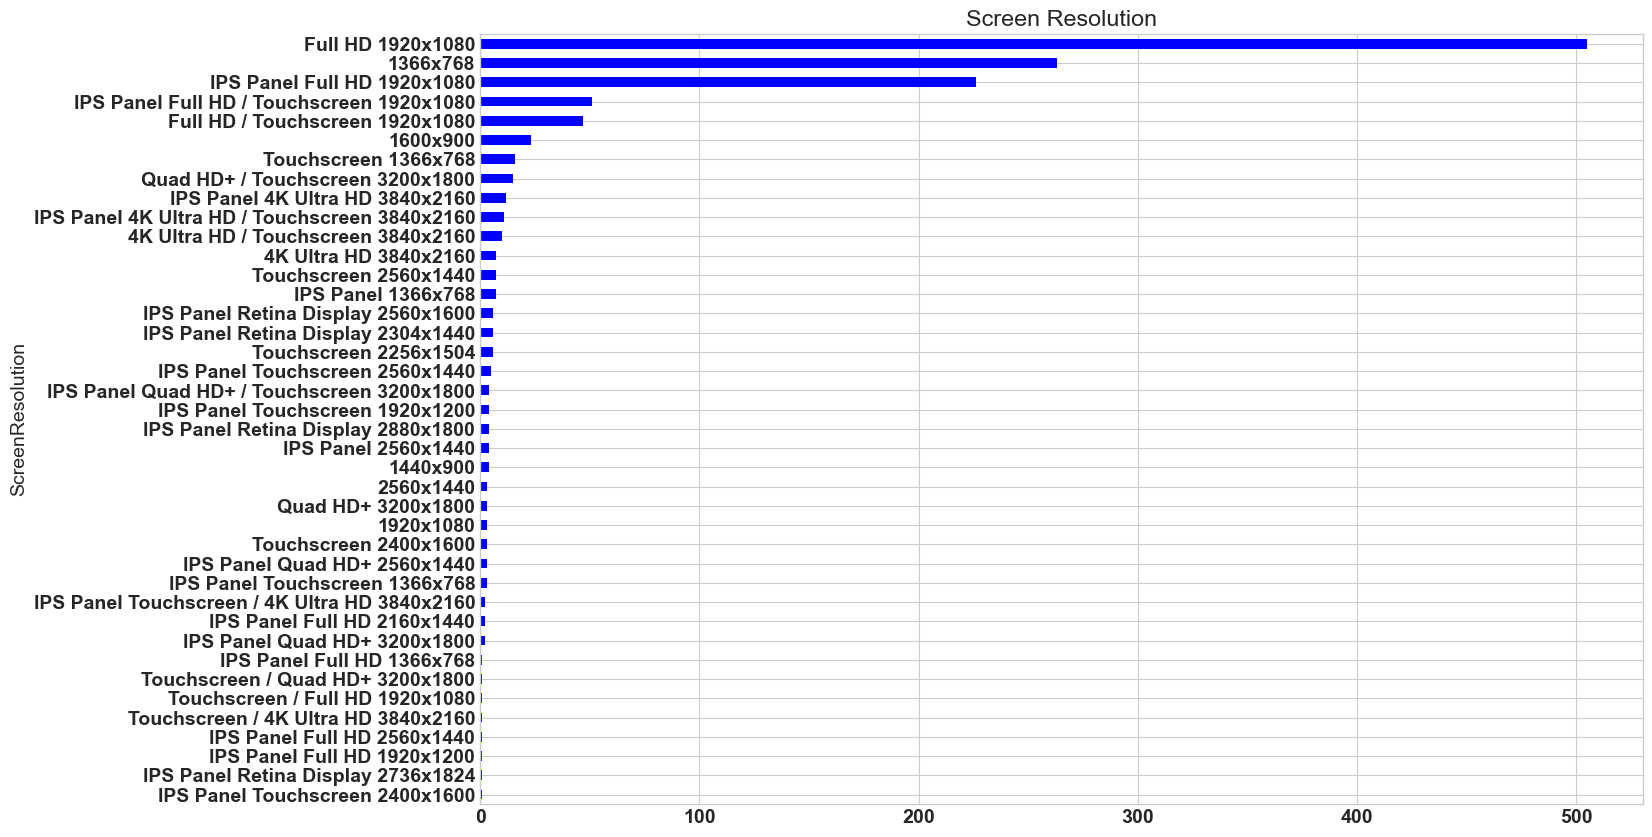

In [12]:
sr = new_data['ScreenResolution'].value_counts()
sr = sr.sort_values(ascending=True)
plt.figure(figsize=(15, 10))
sr.plot(kind='barh', color='b', title='Screen Resolution')

plt.savefig('graphimages/resolution.png')

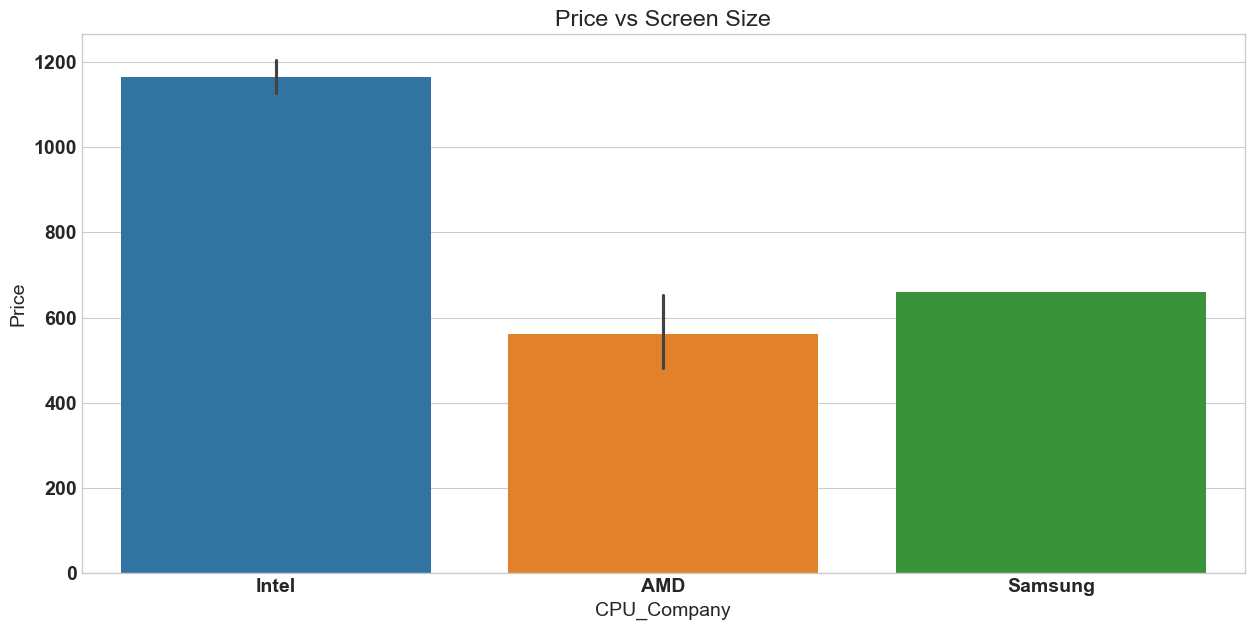

In [13]:
plt.figure(figsize=(15, 7))
sns.barplot(x='CPU_Company', y="Price", data=new_data, hue='CPU_Company')
plt.title('Price vs Screen Size')
plt.savefig('graphimages/cpu.png')

In [14]:
new_data['CPU_Type'].value_counts()

CPU_Type
Core i5 7200U       193
Core i7 7700HQ      147
Core i7 7500U       133
Core i3 6006U        81
Core i7 8550U        73
                   ... 
Core M m3             1
E-Series E2-9000      1
Core M M3-6Y30        1
A6-Series 7310        1
A9-Series 9410        1
Name: count, Length: 93, dtype: int64

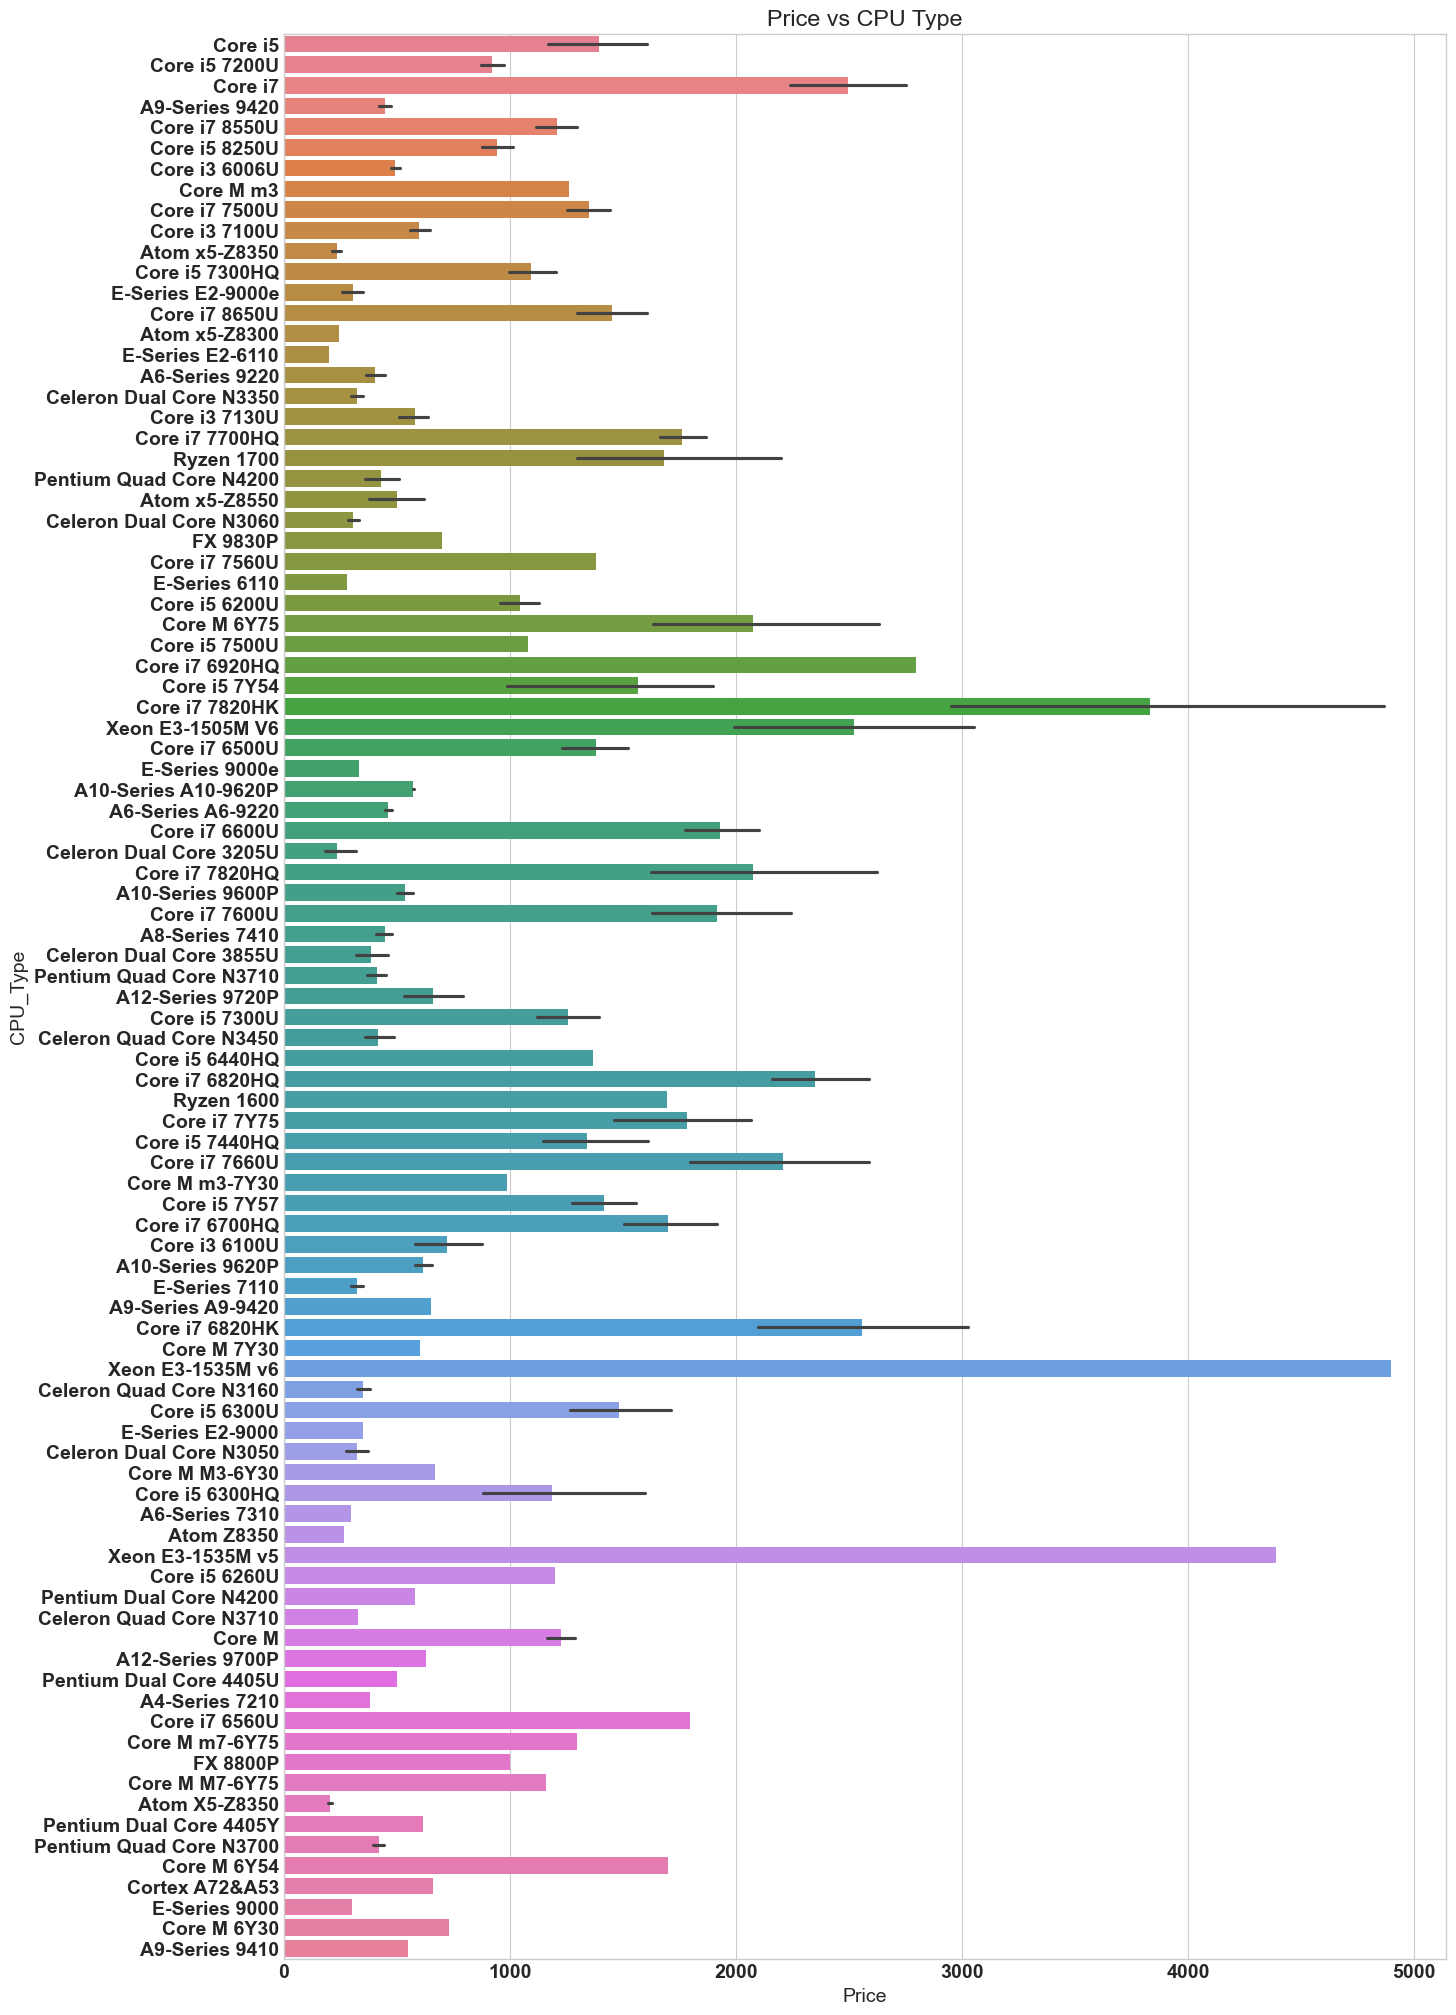

In [15]:
plt.figure(figsize=(15, 25))
sns.barplot(x="Price", y="CPU_Type", data=new_data, hue='CPU_Type')
plt.title('Price vs CPU Type')
plt.savefig('graphimages/cputype.png')

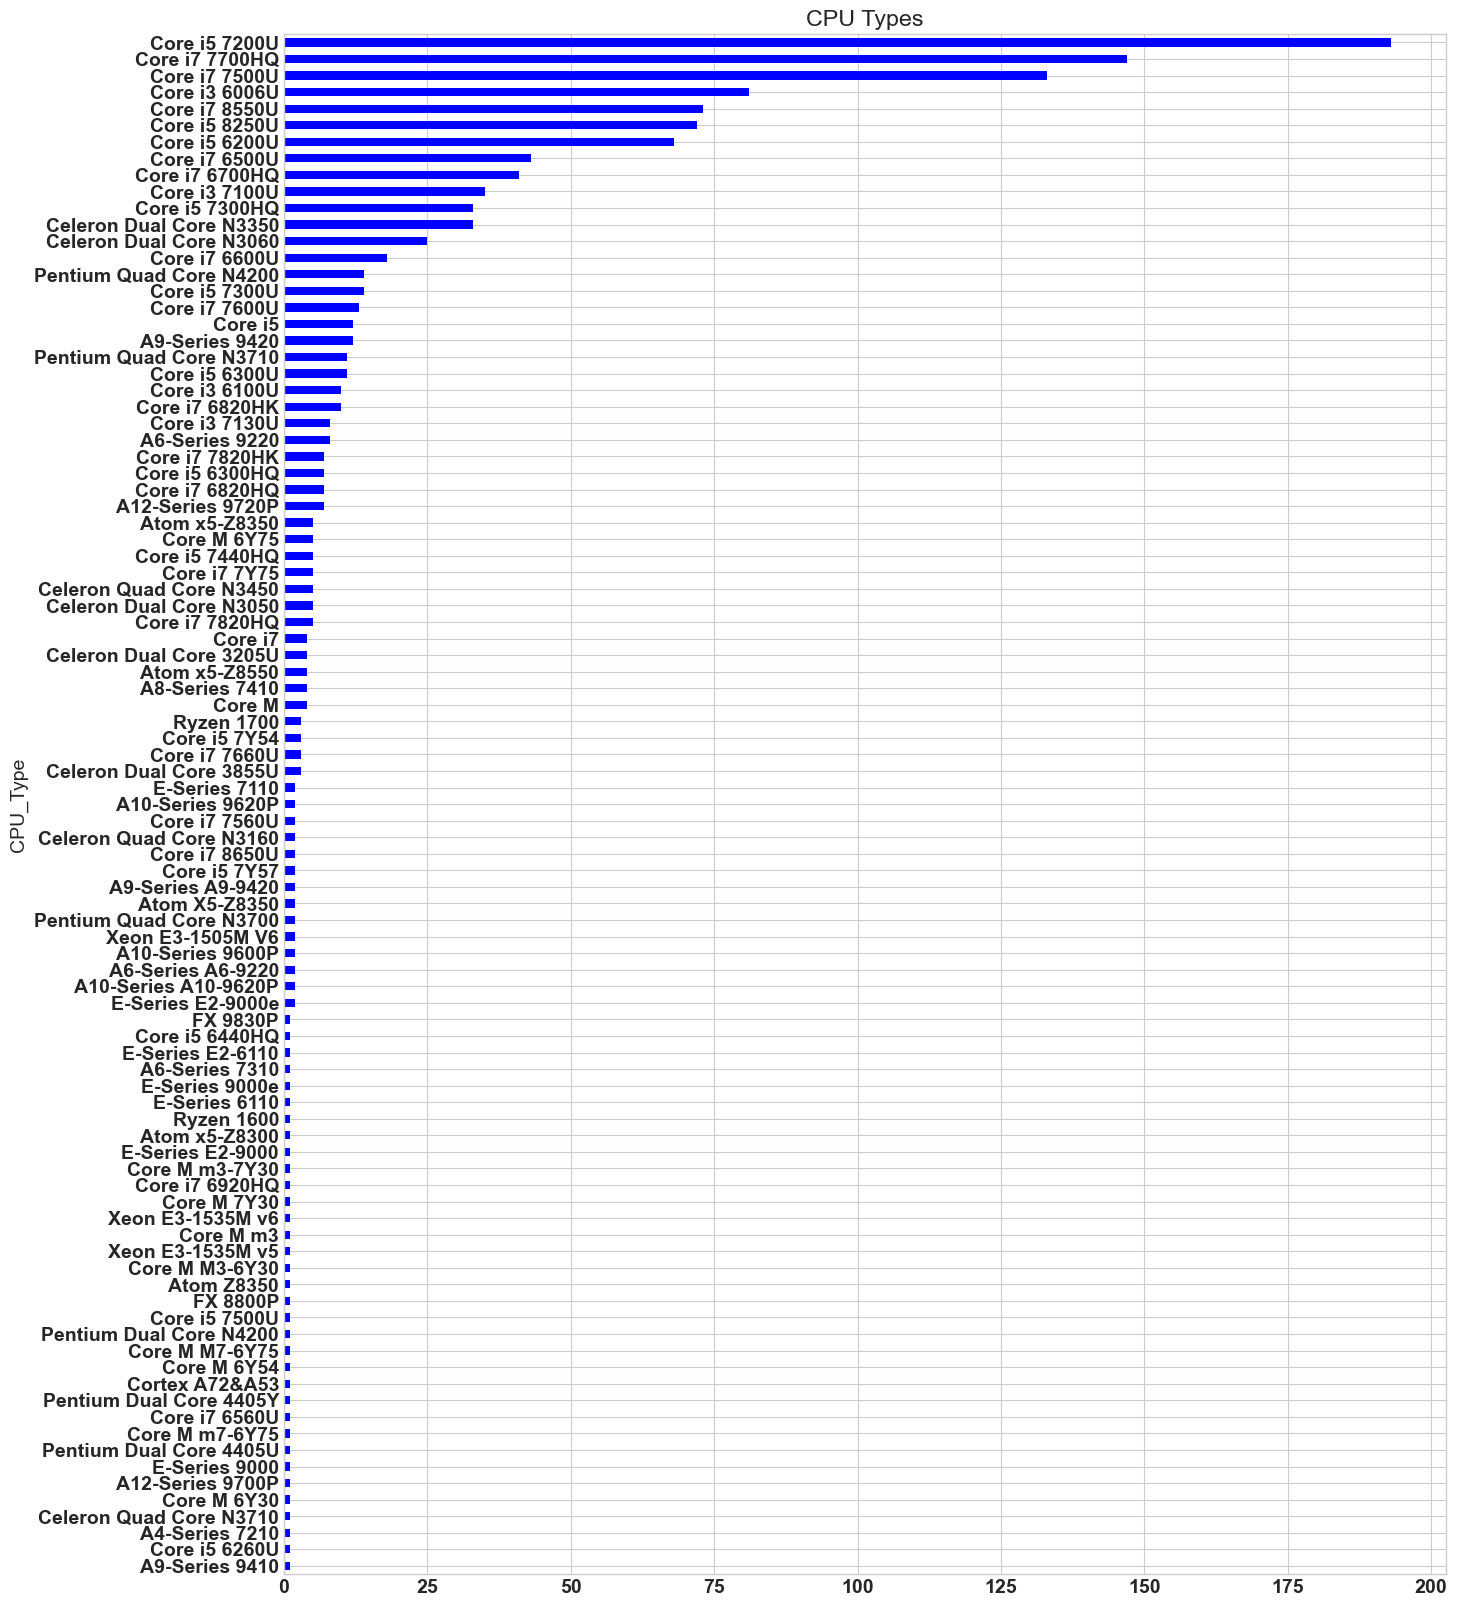

In [16]:
cputype = new_data['CPU_Type'].value_counts()
cputype = cputype.sort_values(ascending=True)
plt.figure(figsize=(15, 20))
cputype.plot(kind='barh', color='b', title='CPU Types')

plt.savefig('graphimages/cputypecount.png')

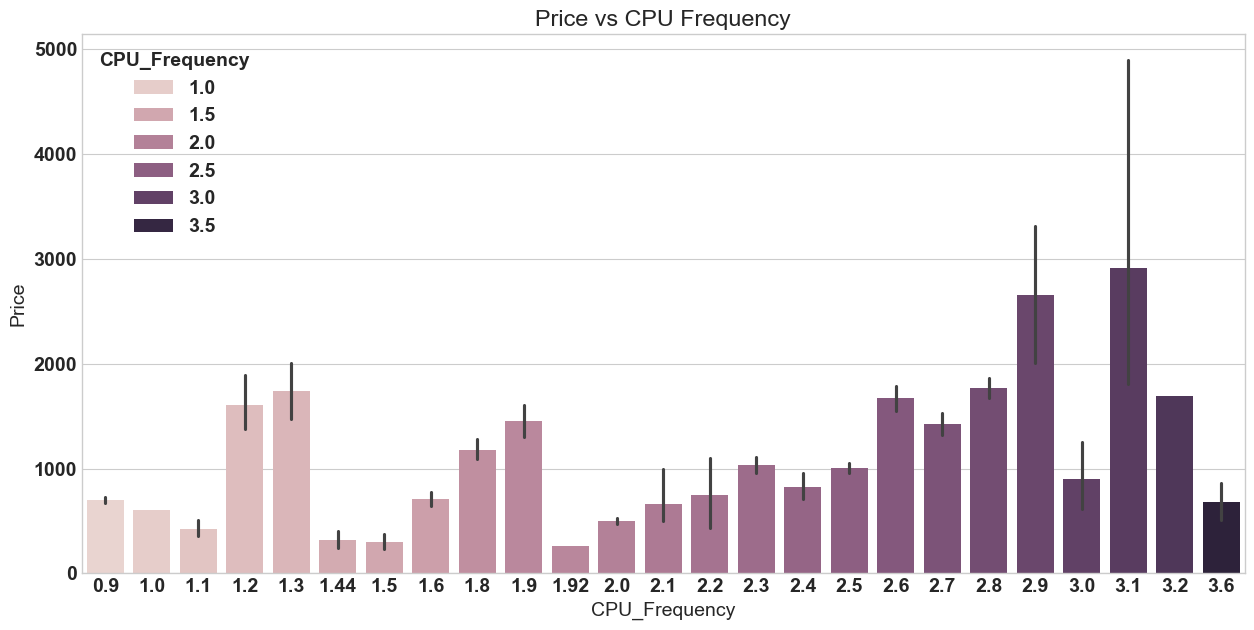

In [17]:
plt.figure(figsize=(15, 7))
sns.barplot(x="CPU_Frequency", y="Price", data=new_data, hue='CPU_Frequency')
plt.title('Price vs CPU Frequency')
plt.savefig('graphimages/frequency.png')

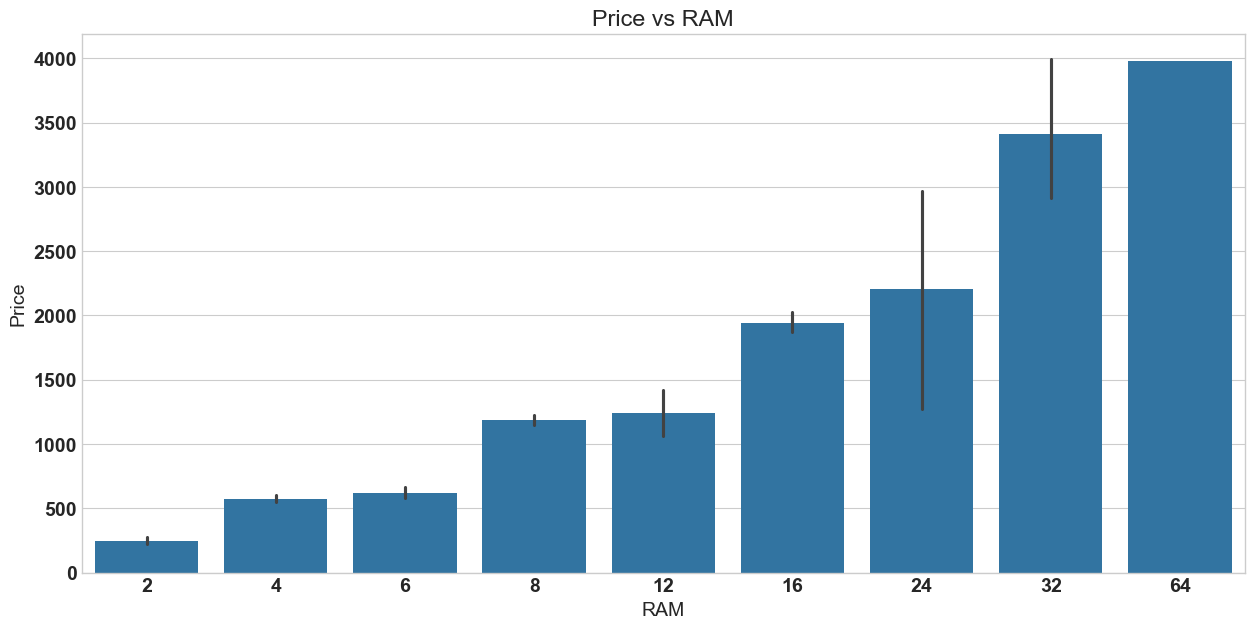

In [18]:
plt.figure(figsize=(15, 7))
sns.barplot(x="RAM", y="Price", data=new_data)
plt.title('Price vs RAM')
plt.savefig('graphimages/ram.png')

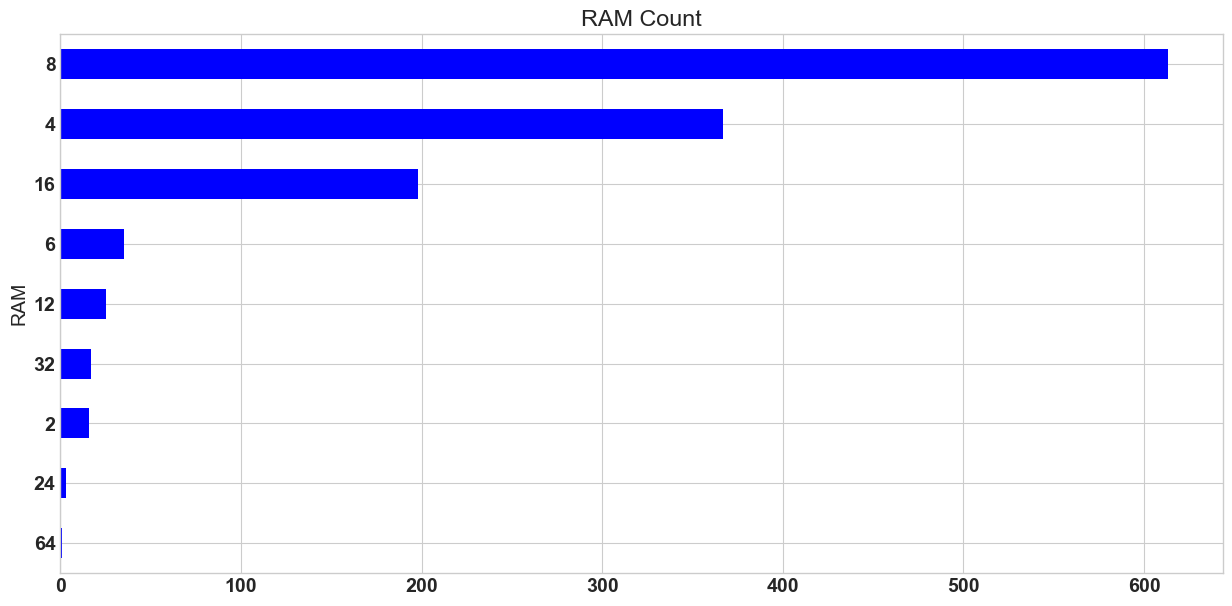

In [19]:
ram = new_data['RAM'].value_counts()

ram = ram.sort_values(ascending=True)
plt.figure(figsize=(15, 7))
ram.plot(kind='barh', color='b', title='RAM Count')

plt.savefig('graphimages/gpucount.png')

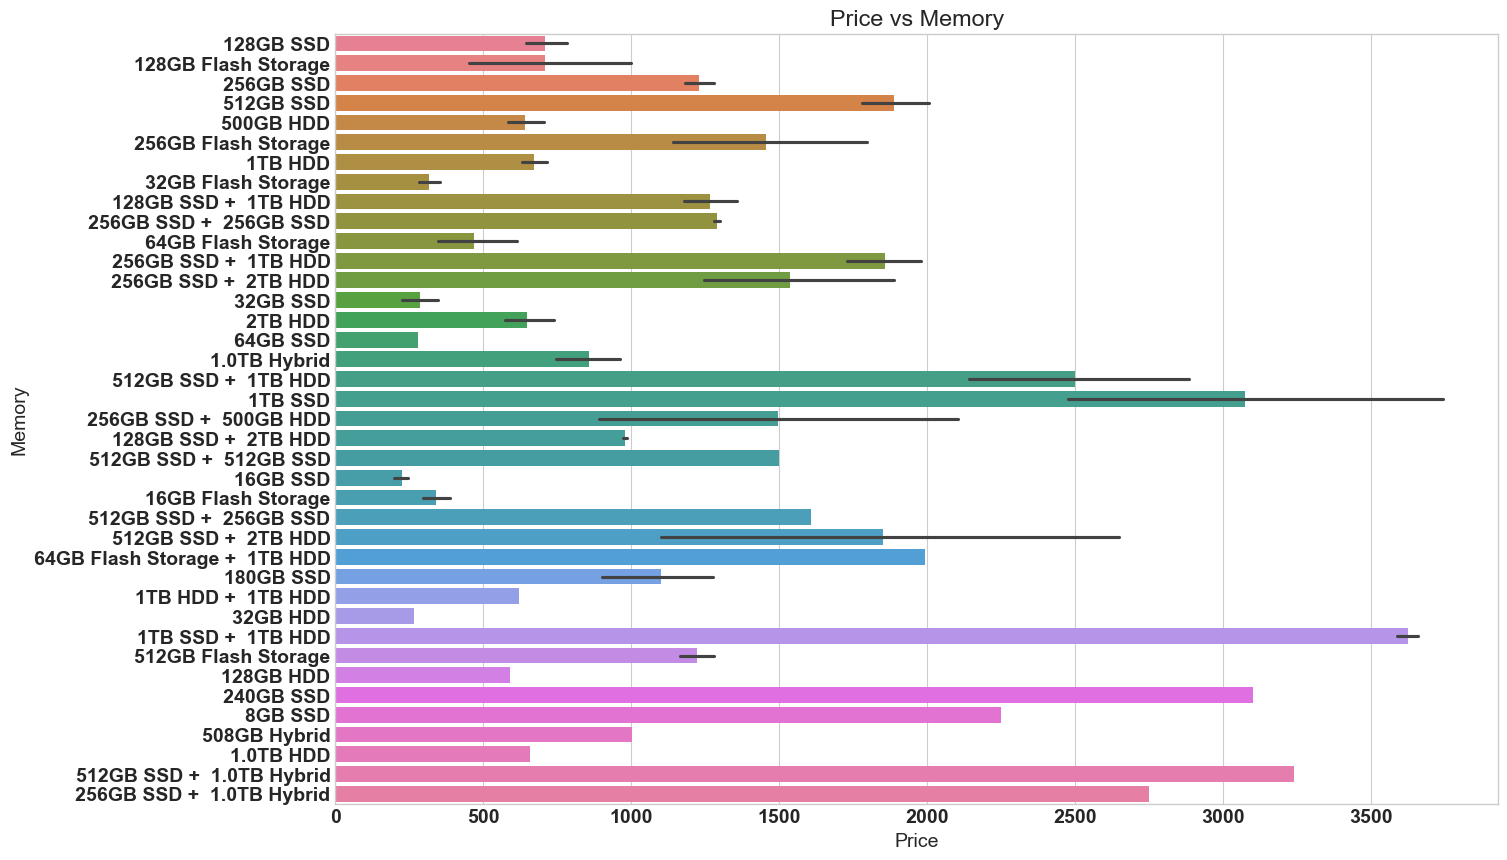

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Price", y="Memory", data=new_data, hue='Memory')
plt.title('Price vs Memory')
plt.savefig('graphimages/memory.png')

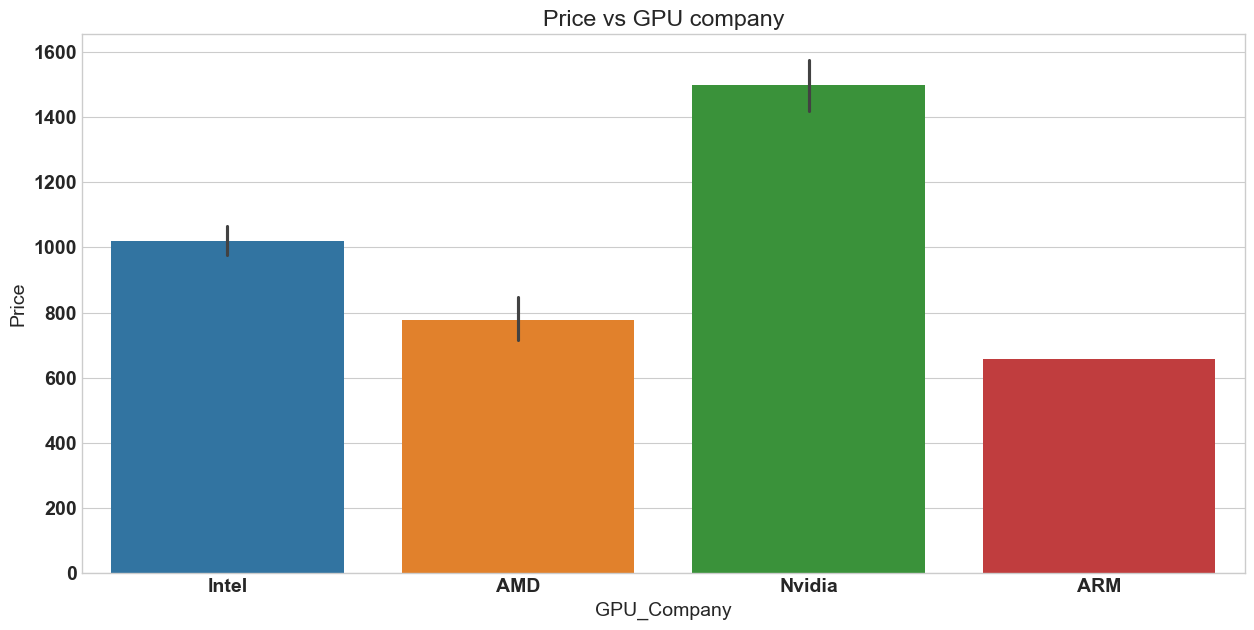

In [21]:
plt.figure(figsize=(15, 7))
sns.barplot(x="GPU_Company", y="Price", data=new_data, hue='GPU_Company')
plt.title('Price vs GPU company')
plt.savefig('graphimages/gpu.png')

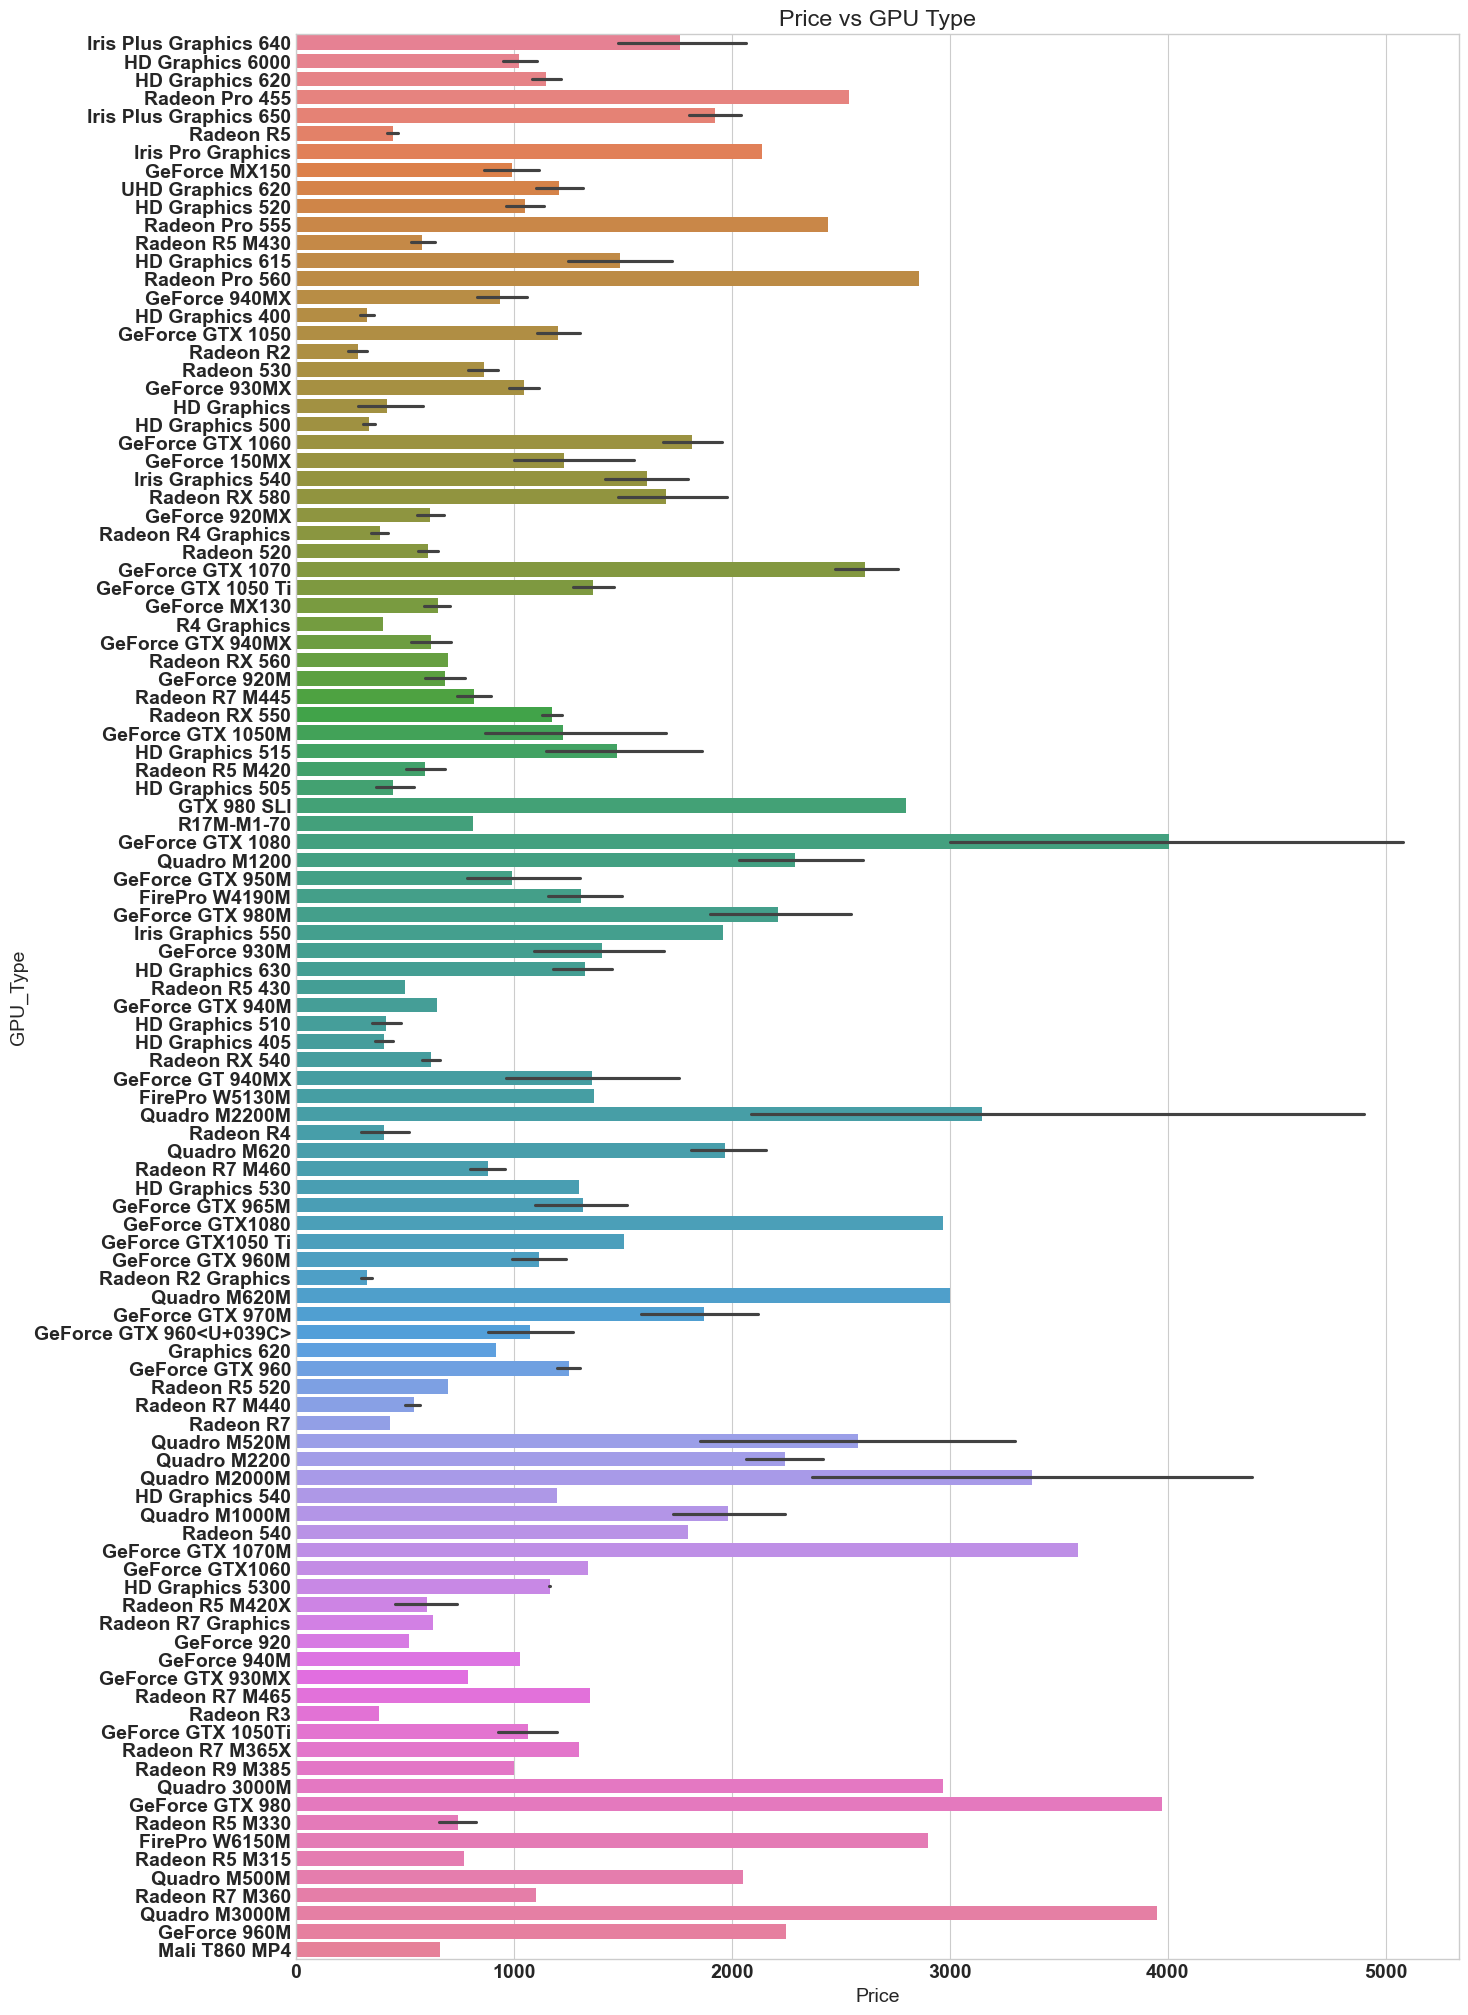

In [22]:
plt.figure(figsize=(15, 25))
sns.barplot(x="Price", y="GPU_Type", data=new_data, hue='GPU_Type')
plt.title('Price vs GPU Type')
plt.savefig('graphimages/cpu_type.png')

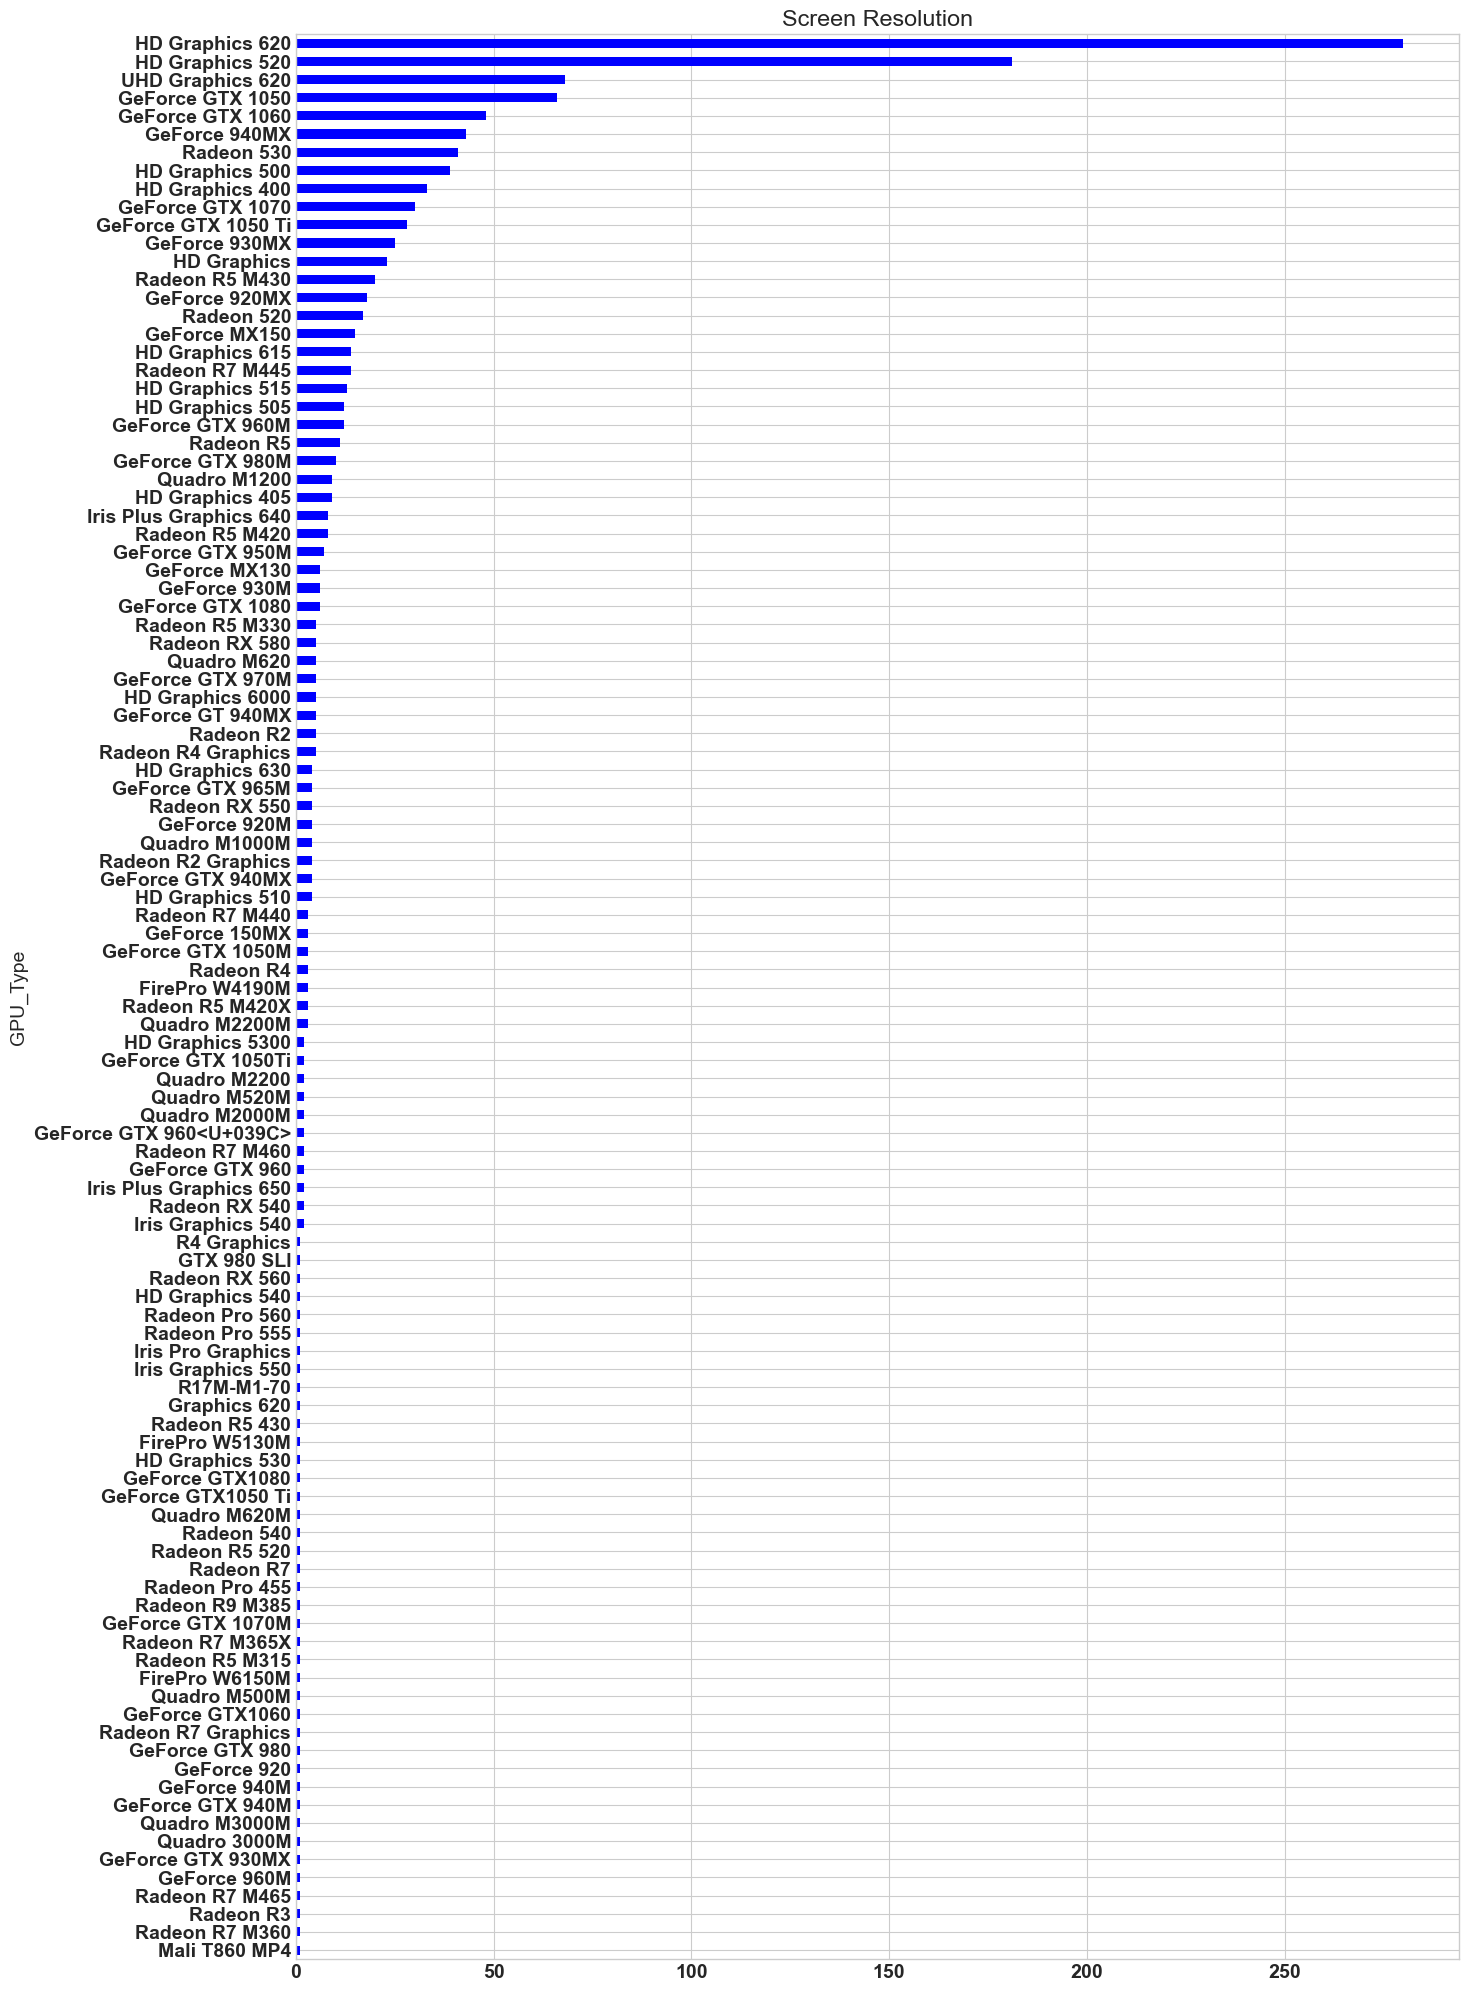

In [23]:
gpu = data['GPU_Type'].value_counts()
gpu = gpu.sort_values(ascending=True)
plt.figure(figsize=(15, 25))
gpu.plot(kind='barh', color='b', title='Screen Resolution')

plt.savefig('graphimages/gpucount.png')

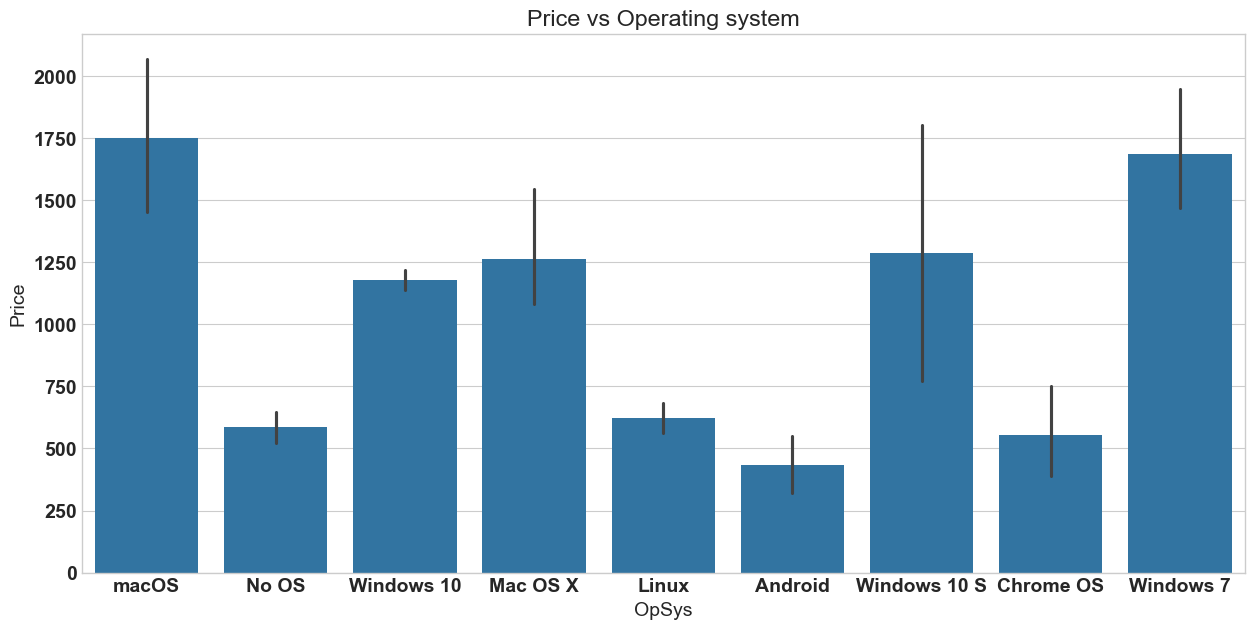

In [24]:
plt.figure(figsize=(15, 7))
sns.barplot(x="OpSys", y="Price", data=new_data)
plt.title('Price vs Operating system')
plt.savefig('graphimages/opsys.png')


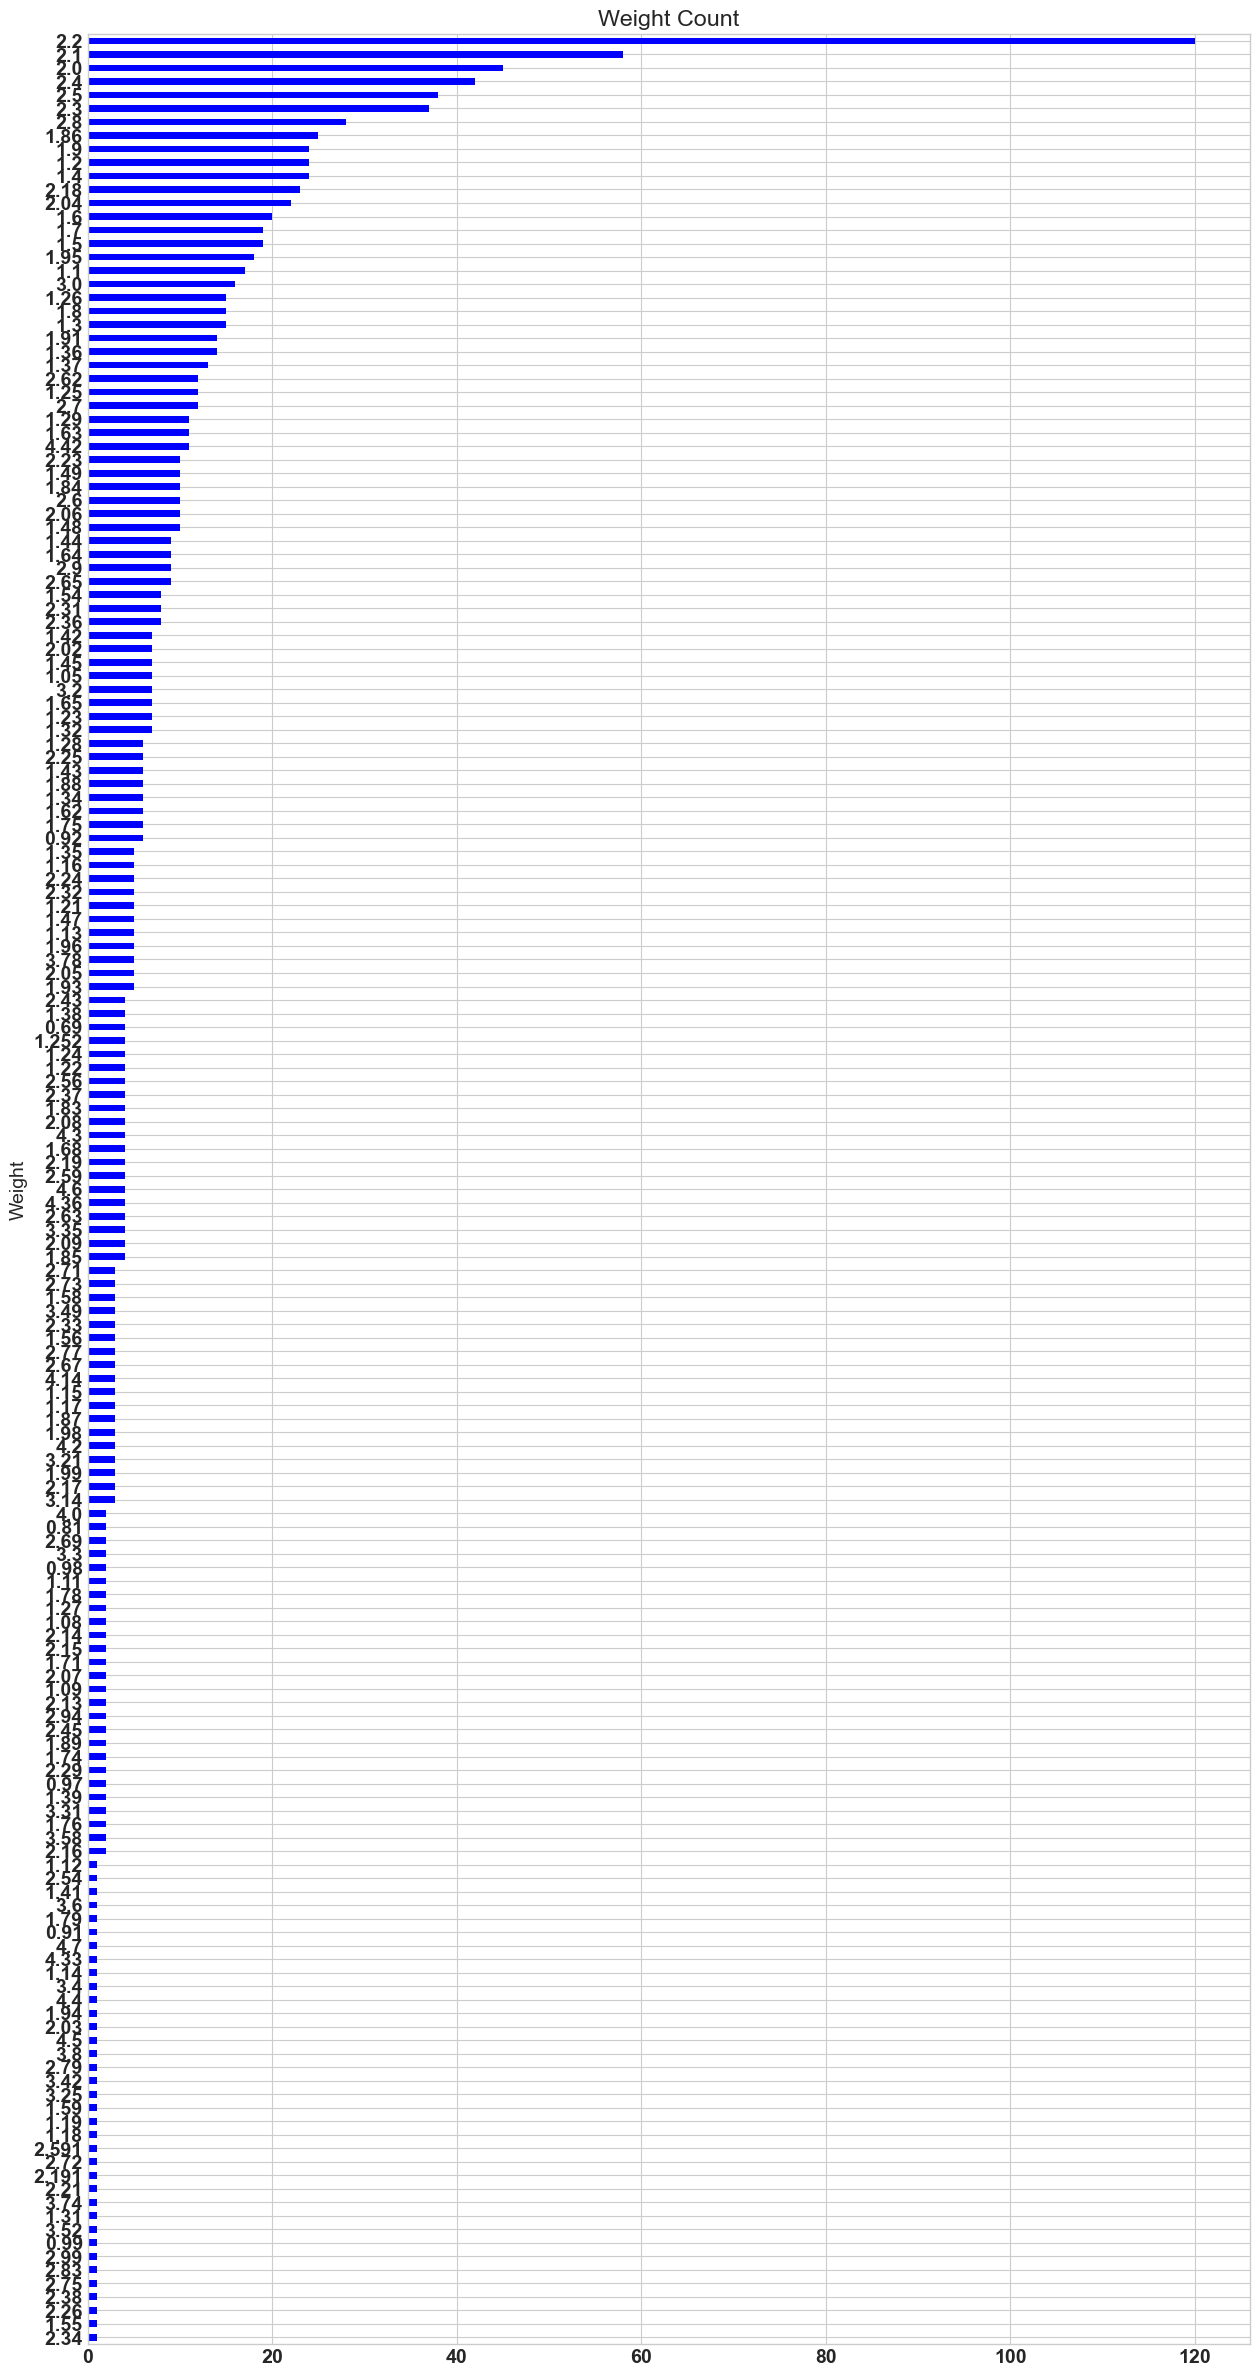

In [25]:
weight = new_data['Weight'].value_counts()
weight = weight.sort_values(ascending=True)
plt.figure(figsize=(15, 30))
weight.plot(kind='barh', color='b', title='Weight Count')
plt.savefig('graphimages/weight.png')

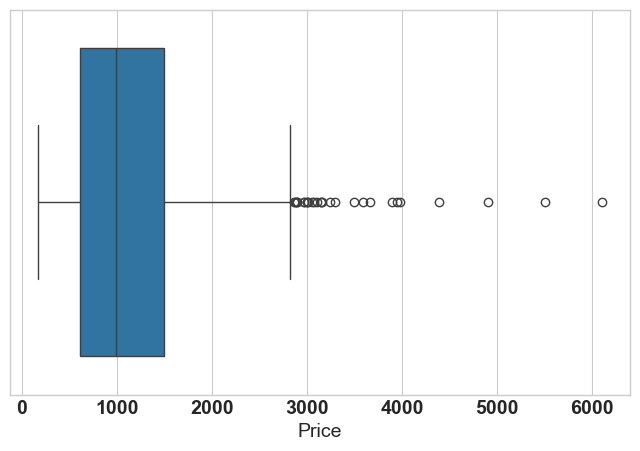

In [26]:
sns.boxplot(x="Price", data=new_data)
plt.show()

In [27]:
Q1 = new_data['Price'].quantile(0.25)
Q3 = new_data['Price'].quantile(0.75)
IQR = Q3 - Q1

print(f"Quantile 1: {Q1}")
print(f"\nQuantile 2: {Q3}")
print(f"\nIQR: {IQR}")

lower_bound = Q1 - 1.5 * IQR
uppper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {uppper_bound}")

Quantile 1: 609.0

Quantile 2: 1496.5

IQR: 887.5
Lower Bound: -722.25, Upper Bound: 2827.75


In [28]:
outliers = new_data[(new_data['Price'] < lower_bound) | (new_data['Price'] > uppper_bound)]
print(outliers)

     Company             Product     TypeName  Inches  \
17     Apple         MacBook Pro    Ultrabook    15.4   
196    Razer           Blade Pro       Gaming    17.3   
204     Dell      Precision 7520  Workstation    15.6   
238     Asus   ROG G703VI-E5062T       Gaming    17.3   
247     Asus  Rog G701VIK-BA060T       Gaming    17.3   
297     Dell      Precision 7720  Workstation    17.3   
517     Asus        ROG Zephyrus       Gaming    15.6   
530     Dell        Alienware 17       Gaming    17.3   
563   Lenovo        Thinkpad P71     Notebook    17.3   
610   Lenovo        Thinkpad P51     Notebook    15.6   
659     Dell        Alienware 17       Gaming    17.3   
723     Dell        Alienware 17       Gaming    17.3   
744   Lenovo       Thinkpad P51s  Workstation    15.6   
749       HP            Zbook 17  Workstation    17.3   
758     Dell        Alienware 17       Gaming    15.6   
778    Razer           Blade Pro       Gaming    14.0   
780     Dell        Alienware 1

In [32]:
# Allows the class to clone and manage the transformer properly
from sklearn.base import BaseEstimator, TransformerMixin

categorical_columns = ['Company', 'TypeName', 'ScreenResolution', 'CPU_Company', 'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys']
numerical_columns = ['Inches', 'CPU_Frequency', 'RAM', 'Weight', 'Price']


class LabelEncoderTransformer:
    '''Uses Label Encoder in each categorical columns'''
    def fit(self, X, y=None):
        self.label_encoders = {}
        for column in categorical_columns:
            le = LabelEncoder()
            self.label_encoders[column] = le.fit(X[column])
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        for column in categorical_columns:
            X_encoded[column] = self.label_encoders[column].transform(X[column])
        return X_encoded
    
    def get_params(self, deep=True):
        return {}
    
    def set_params(self, **params):
        pass

# Using ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', LabelEncoderTransformer(), categorical_columns)
    ]
)

transformed = preprocessor.fit_transform(new_data)
print(transformed)

[[-1.20574632e+00 -5.91760846e-03 -8.64993649e-02 ...  2.00000000e+00
   5.60000000e+01  8.00000000e+00]
 [-1.20574632e+00 -9.98674290e-01 -8.64993649e-02 ...  2.00000000e+00
   5.00000000e+01  8.00000000e+00]
 [ 4.03873147e-01  3.91185064e-01 -8.64993649e-02 ...  2.00000000e+00
   5.20000000e+01  4.00000000e+00]
 ...
 [-7.15862135e-01 -1.39577696e+00 -1.26393734e+00 ...  2.00000000e+00
   3.90000000e+01  5.00000000e+00]
 [ 4.03873147e-01  3.91185064e-01 -4.78978689e-01 ...  0.00000000e+00
   8.80000000e+01  5.00000000e+00]
 [ 4.03873147e-01 -1.39577696e+00 -8.71458014e-01 ...  2.00000000e+00
   3.90000000e+01  5.00000000e+00]]


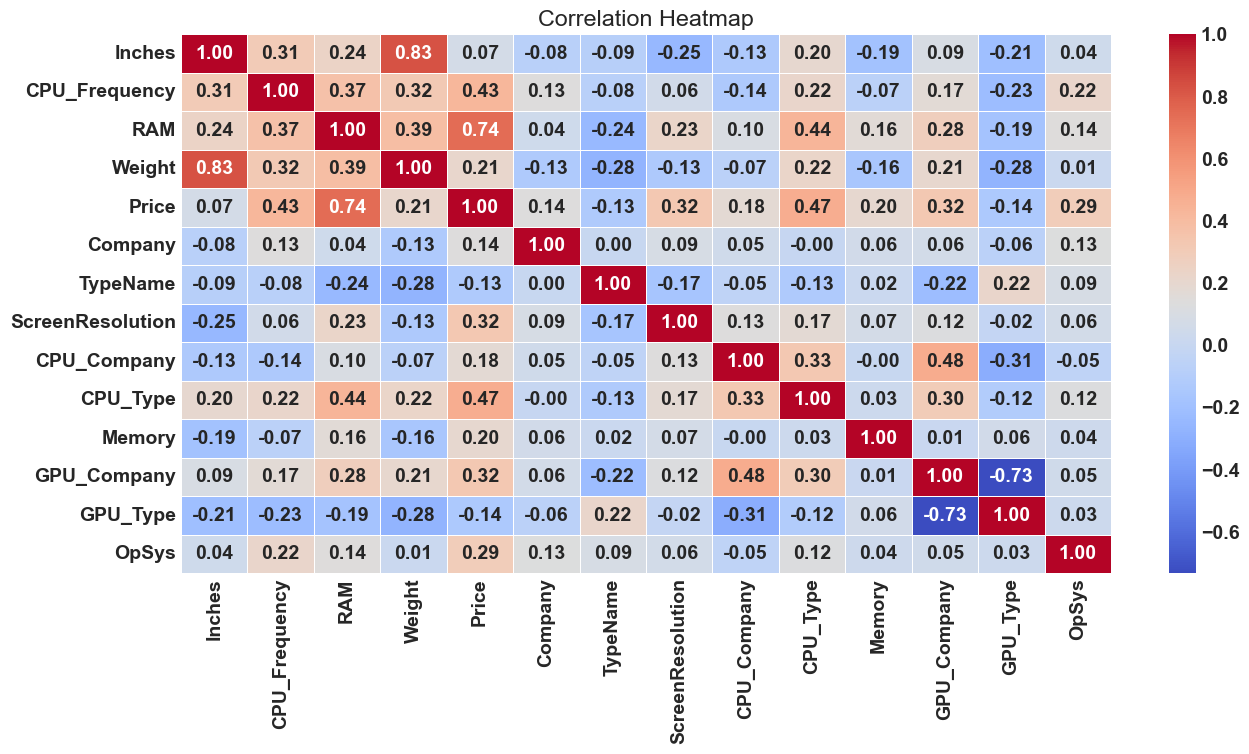

In [33]:
num_columns = numerical_columns
cat_columns = categorical_columns  # If you are using LabelEncoder
columns = num_columns + cat_columns  # Adjust based on what you used for encoding

# Create a DataFrame with appropriate column names
transformed_df = pd.DataFrame(transformed, columns=columns)

# Compute the correlation matrix
corr_matrix = transformed_df.corr()

# Create the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [66]:
X = transformed_df.drop('Price', axis=1)
y = new_data['Price']

In [67]:
'''Checking for multicollinearity in the dataset'''

independent_variables = X
thresh = 10

for i in np.arange(0, len(independent_variables)):
    vif = [variance_inflation_factor(independent_variables.values, ix)
            for ix in range(independent_variables.shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print(f"VIF: {vif}")
        print(f"dropping '{independent_variables.columns[maxloc]}' at index {str(maxloc)}")
        # Drop the column with the highest VIF
        independent_variables.drop(columns=independent_variables.columns[maxloc], inplace=True)
    else:
        break

print(f'final variables {independent_variables}')

VIF: [3.7840692442055235, 1.4197843346413506, 1.6054281929619785, 4.0825575001736425, 3.7113368026315623, 6.36601134657798, 2.924611790058566, 27.455390261213154, 14.717346387379752, 5.4523774482387894, 14.748989735779862, 8.053774229396016, 20.134680171736846]
dropping 'CPU_Company' at index 7
VIF: [3.7486206109661717, 1.3351069409223457, 1.5797057738731741, 4.06849425436146, 3.65643406135662, 6.177672300162077, 2.912080372370459, 12.724417164082974, 5.442886173817511, 10.664738157185248, 7.7414249566963, 19.717221990481992]
dropping 'OpSys' at index 11
VIF: [3.744799240410582, 1.2970279952684525, 1.5653363738454213, 4.060463700416257, 3.5128801147112148, 5.779434367106139, 2.8847784476703744, 12.35213999361185, 5.309861882034877, 8.706640457381827, 6.215267796787831]
dropping 'CPU_Type' at index 7
final variables         Inches  CPU_Frequency       RAM    Weight  Company  TypeName  \
0    -1.205746      -0.005918 -0.086499 -1.002380      1.0       4.0   
1    -1.205746      -0.998674

## Training the data

In [68]:
# Splitting the data set into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)

In [69]:
model.fit(X_train, y_train)

# Predictionson test set

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean square error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared: {mse}")

Mean square error: 153741.27388849278
Mean absolute error: 288.0564292517188
R-squared: 153741.27388849278


In [70]:
lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              920.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):                        0.00
Time:                        19:50:16   Log-Likelihood:                         -7601.2
No. Observations:                1020   AIC:                                  1.522e+04
Df Residuals:                    1010   BIC:                                  1.527e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------